In [1]:
from icecube import icetray, dataclasses, dataio, simclasses
from icecube.icetray import I3Units, OMKey, I3Frame
from icecube.dataclasses import ModuleKey
import numpy as np
import random, re, os
from optparse import OptionParser

In [2]:
file = dataio.I3File('/data/p-one/akatil/test/step_4_713_medium_water_custom_mDOM_noise.i3.gz')
outfile = dataio.I3File('/data/p-one/akatil/test/step_4_713_medium_water_custom_mDOM_noise_merged.i3.gz', 'w')

for frame in file:

    mcpeMap = frame['MCPESeriesMap']
    mcpeOMKeys = mcpeMap.keys()

    noiseMap = frame['NoiseSeriesMap']
    noiseOMKeys = noiseMap.keys()

    mergedHitsMap = simclasses.I3MCPESeriesMap()

    for omkey in noiseOMKeys:
        newMCPEList = simclasses.I3MCPESeries()
        noise_mcpeList = noiseMap[omkey]
        
        for mcpe in noise_mcpeList:
            newMCPEList.append(mcpe)

        if omkey in mcpeOMKeys:
            mcpeList = mcpeMap[omkey]
            for mcpe in mcpeList:
                newMCPEList.append(mcpe)
                
        mergedHitsMap[omkey] = newMCPEList

    frame["MergedMCPETreeName"] = mergedHitsMap
    
    outfile.push(frame)
    
outfile.close()
file.close()

In [3]:
file = dataio.I3File('/data/p-one/akatil/test/step_4_713_medium_water_custom_mDOM_noise_merged.i3.gz')
outfile = dataio.I3File('/data/p-one/akatil/test/step_4_713_medium_water_custom_mDOM_noise_timeCorrected.i3.gz', 'w')

for frame in file:
    
    mcpeMap = frame['MergedMCPETreeName']
    mcpeOMKeys = mcpeMap.keys()
    
    timeCorrectedMap = simclasses.I3MCPESeriesMap()
    
    for omkey in mcpeOMKeys:
        newMCPEList = simclasses.I3MCPESeries()
        
        mcpeList = mcpeMap[omkey]
        
        timeList = np.array([mcpe.time for mcpe in mcpeList])
        
        if len(timeList) != 0:
            min_time = min(timeList)
        
            for mcpe in mcpeList:
                mcpe.time = (mcpe.time - min_time) + 7200 #[Units: ns]
                newMCPEList.append(mcpe)
        
            timeCorrectedMap[omkey] = newMCPEList
        
    #print(len(timeCorrectedMap))
    frame["timeCorrectedMCPEMap"] = timeCorrectedMap
    
    outfile.push(frame)
    
outfile.close()
file.close()
    

In [18]:
file = dataio.I3File('/data/p-one/akatil/test/step_4_713_medium_water_custom_mDOM_noise_timeCorrected.i3.gz')
outfile = dataio.I3File('/data/p-one/akatil/test/step_4_713_medium_water_custom_mDOM_noise_RecoPulses.i3.gz', 'w')

for frame in file:
    
    timeWindow = 3
    mcpeMap = frame['timeCorrectedMCPEMap']
    mcpeOMKeys = mcpeMap.keys()
    
    recoPulseMap = dataclasses.I3RecoPulseSeriesMap()
    
    for omkey in mcpeOMKeys:
        mcpeList = mcpeMap[omkey]
        timeList = [mcpe.time for mcpe in mcpeList]
        charge = np.array([mcpe.npe for mcpe in mcpeList])
        
        sortedCharge = [x for _,x in sorted(zip(timeList,charge))] #Sorting the charge with respect to the timeList
        sortedTimeList = np.sort(timeList) #Timestamps are not sorted in timeList
        sortedmcpeList = [x for _,x in sorted(zip(timeList, mcpeList))]
        recoPulses = dataclasses.I3RecoPulseSeries()
        
        i = 0
        while i<len(sortedTimeList):
            mcpe = sortedmcpeList[i]
            time_end = mcpe.time+timeWindow
            times = []
            charges = []
            
            while mcpe.time < time_end and i<len(sortedTimeList):

                times.append(mcpe.time)
                charges.append(sortedCharge[i])
                i += 1
                if i < len(sortedTimeList):
                    mcpe = sortedmcpeList[i]
            
            recoPulse = dataclasses.I3RecoPulse()
            recoPulse.charge = sum(charges)
            recoPulse.width = 3*I3Units.ns
            recoPulse.time = times[0]
        
            recoPulses.append(recoPulse)
            
        recoPulseMap[omkey] = recoPulses
        
    frame["I3RecoPulses"] = recoPulseMap
    
    outfile.push(frame)
    
outfile.close()
file.close()
    

('CHARGE!', 890)
('CHARGE!', 677)
('CHARGE!', 231)
('CHARGE!', 834)
('CHARGE!', 524)
('CHARGE!', 140)
('CHARGE!', 175)
('CHARGE!', 201)
('CHARGE!', 107)
('CHARGE!', 147)
('CHARGE!', 416)
('CHARGE!', 335)
('CHARGE!', 111)
('CHARGE!', 450)
('CHARGE!', 296)
('CHARGE!', 113)
('CHARGE!', 151)
('CHARGE!', 391)
('CHARGE!', 339)
('CHARGE!', 206)
('CHARGE!', 1099)
('CHARGE!', 1680)
('CHARGE!', 525)
('CHARGE!', 197)
('CHARGE!', 101)
('CHARGE!', 765)
('CHARGE!', 484)
('CHARGE!', 152)
('CHARGE!', 260)
('CHARGE!', 106)
('CHARGE!', 312)
('CHARGE!', 654)
('CHARGE!', 332)
('CHARGE!', 109)
('CHARGE!', 136)
('CHARGE!', 182)
('CHARGE!', 199)
('CHARGE!', 133)
('CHARGE!', 111)
('CHARGE!', 138)
('CHARGE!', 187)
('CHARGE!', 195)
('CHARGE!', 149)
('CHARGE!', 103)


In [ ]:
# timeList
print(timeList)
charge = [0, 0.3, 1, 0.4, 0.2]
sortedCharge = [x for _,x in sorted(zip(timeList,charge))]

In [45]:
len(timeListTest)
charge = [0.8, 0, 0.3, 1, 0.4, 0.2, 0.5, 0.1, 0.9]

In [46]:
sortedCharge = [x for _,x in sorted(zip(timeListTest,charge))]

In [47]:
sortedCharge

[0.2, 0.8, 0.9, 1, 0.3, 0.5, 0, 0.4, 0.1]

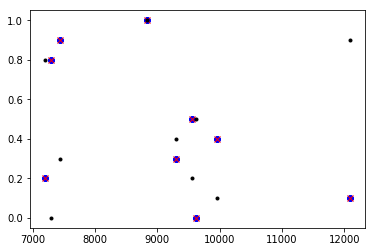

In [61]:
import matplotlib.pylab as plt
plt.plot(timeListTest, charge, '8', c='b')
plt.plot(np.sort(timeListTest), sortedCharge, 'x', c='r')
plt.plot(np.sort(timeListTest), charge, '.', c='k')

In [1]:
from I3Tray import *
from icecube import icetray, dataclasses, dataio, simclasses
from icecube.icetray import I3Units, OMKey, I3Frame
from icecube.dataclasses import ModuleKey
import numpy as np
import random, re, os
from optparse import OptionParser
from os.path import expandvars
import NoiseGenerator
import time

In [ ]:
start_time = time.time()

######
"""Noise"""
######

def loadFile(File):
    print 'loading file'
    data = np.loadtxt(File)

    channel = data[:, 0]
    upperPMT = data[(channel==1)]
    lowerPMT = data[(channel==5)]
    risingEdge = upperPMT[upperPMT[:, 1] == 0]
    #risingEdgeL = lowerPMT[lowerPMT[:, 1] == 0]
    timestamps = risingEdge[:, 2]
    print 'timestamps generated'
    return timestamps

#######
'''I3Module'''
#######

def choose_file():
    filename = random.choice(os.listdir("/data/p-one/gaertner/2004_embla/unpacked/"))
    FLASH_re = re.compile('FLASH')
    if len(FLASH_re.findall(filename)) > 0:
        return choose_file()
    else:
        return filename

#file = dataio.I3File('/data/p-one/akatil/step_3_medium_water/Custom/step_3_1000_medium_water_custom.i3.gz')
filename = choose_file()
print 'STRAW DATA file used -' + str(filename)
timestamps = loadFile('/data/p-one/gaertner/2004_embla/unpacked/' + filename)

print "--- %s seconds for loading files ---" % (time.time() - start_time)

start_time = time.time()
GCDFILE = '/home/users/akatil/P-ONE/GCD_files/PONE_Phase1.i3.gz'
INFILE = '/data/p-one/akatil/step_3_medium_water/Custom/NuTau_NuE_100E_300R_1300H/step_3_3746_medium_water_custom_mDOM.i3.gz'
OUTFILE = '/data/p-one/akatil/test/step_4_3746_medium_water_custom_mDOM_checking_time.i3.gz'
tray = I3Tray()

tray.AddModule('I3Reader', 'reader',
            FilenameList = [GCDFILE, INFILE]
            )

tray.AddModule(NoiseGenerator.addNoise, "InjectSTRAWNoise",
               GCDFile = GCDFILE,
               PhysicsMCPETreeName = "MCPESeriesMap",
               NoiseMCPEMCTreeName = "NoiseSeriesMap",
               STRAWTimestamps = timestamps)

tray.AddModule("I3Writer","writer",
               #SkipKeys=SkipKeys,
               Filename = OUTFILE,
               Streams = [icetray.I3Frame.DAQ, icetray.I3Frame.Physics],
              )

tray.AddModule("TrashCan","adios")
tray.Execute()
tray.Finish()


print "--- %s seconds for running NoiseGenerator ---" % (time.time() - start_time)

STRAW DATA file used -20200426_092044_UTC_SDOM1_MUON_EMBLA_DARK_RUN189_60s_2020-04-26_0921_20117092054.txt
loading file
timestamps generated
--- 32.4069461823 seconds for loading files ---
median calculated
adding Hits
OMKey(0,0,0)
adding Hits
OMKey(0,1,0)
adding Hits
OMKey(0,2,0)
adding Hits
OMKey(0,3,0)
adding Hits
OMKey(0,4,0)
adding Hits
OMKey(0,5,0)
adding Hits
OMKey(0,6,0)
adding Hits
OMKey(0,7,0)
adding Hits
OMKey(0,8,0)
adding Hits
OMKey(0,9,0)
adding Hits
OMKey(0,10,0)
adding Hits
OMKey(0,11,0)
adding Hits
OMKey(0,12,0)
adding Hits
OMKey(0,13,0)
adding Hits
OMKey(0,14,0)
adding Hits
OMKey(0,15,0)
adding Hits
OMKey(0,16,0)
adding Hits
OMKey(0,17,0)
adding Hits
OMKey(0,18,0)
adding Hits
OMKey(0,19,0)
adding Hits
OMKey(1,0,0)
adding Hits
OMKey(1,1,0)
adding Hits
OMKey(1,2,0)
adding Hits
OMKey(1,3,0)
adding Hits
OMKey(1,4,0)
adding Hits
OMKey(1,5,0)
adding Hits
OMKey(1,6,0)
adding Hits
OMKey(1,7,0)
adding Hits
OMKey(1,8,0)
adding Hits
OMKey(1,9,0)
adding Hits
OMKey(1,10,0)
adding 

OMKey(5,13,0)
adding Hits
OMKey(5,14,0)
adding Hits
OMKey(5,15,0)
adding Hits
OMKey(5,16,0)
adding Hits
OMKey(5,17,0)
adding Hits
OMKey(5,18,0)
adding Hits
OMKey(5,19,0)
adding Hits
OMKey(6,0,0)
adding Hits
OMKey(6,1,0)
adding Hits
OMKey(6,2,0)
adding Hits
OMKey(6,3,0)
adding Hits
OMKey(6,4,0)
adding Hits
OMKey(6,5,0)
adding Hits
OMKey(6,6,0)
adding Hits
OMKey(6,7,0)
adding Hits
OMKey(6,8,0)
adding Hits
OMKey(6,9,0)
adding Hits
OMKey(6,10,0)
adding Hits
OMKey(6,11,0)
adding Hits
OMKey(6,12,0)
adding Hits
OMKey(6,13,0)
adding Hits
OMKey(6,14,0)
adding Hits
OMKey(6,15,0)
adding Hits
OMKey(6,16,0)
adding Hits
OMKey(6,17,0)
adding Hits
OMKey(6,18,0)
adding Hits
OMKey(6,19,0)
adding Hits
OMKey(7,0,0)
adding Hits
OMKey(7,1,0)
adding Hits
OMKey(7,2,0)
adding Hits
OMKey(7,3,0)
adding Hits
OMKey(7,4,0)
adding Hits
OMKey(7,5,0)
adding Hits
OMKey(7,6,0)
adding Hits
OMKey(7,7,0)
adding Hits
OMKey(7,8,0)
adding Hits
OMKey(7,9,0)
adding Hits
OMKey(7,10,0)
adding Hits
OMKey(7,11,0)
adding Hits
OMKey(

OMKey(1,13,0)
adding Hits
OMKey(1,14,0)
adding Hits
OMKey(1,15,0)
adding Hits
OMKey(1,16,0)
adding Hits
OMKey(1,17,0)
adding Hits
OMKey(1,18,0)
adding Hits
OMKey(1,19,0)
adding Hits
OMKey(2,0,0)
adding Hits
OMKey(2,1,0)
adding Hits
OMKey(2,2,0)
adding Hits
OMKey(2,3,0)
adding Hits
OMKey(2,4,0)
adding Hits
OMKey(2,5,0)
adding Hits
OMKey(2,6,0)
adding Hits
OMKey(2,7,0)
adding Hits
OMKey(2,8,0)
adding Hits
OMKey(2,9,0)
adding Hits
OMKey(2,10,0)
adding Hits
OMKey(2,11,0)
adding Hits
OMKey(2,12,0)
adding Hits
OMKey(2,13,0)
adding Hits
OMKey(2,14,0)
adding Hits
OMKey(2,15,0)
adding Hits
OMKey(2,16,0)
adding Hits
OMKey(2,17,0)
adding Hits
OMKey(2,18,0)
adding Hits
OMKey(2,19,0)
adding Hits
OMKey(3,0,0)
adding Hits
OMKey(3,1,0)
adding Hits
OMKey(3,2,0)
adding Hits
OMKey(3,3,0)
adding Hits
OMKey(3,4,0)
adding Hits
OMKey(3,5,0)
adding Hits
OMKey(3,6,0)
adding Hits
OMKey(3,7,0)
adding Hits
OMKey(3,8,0)
adding Hits
OMKey(3,9,0)
adding Hits
OMKey(3,10,0)
adding Hits
OMKey(3,11,0)
adding Hits
OMKey(

OMKey(7,14,0)
adding Hits
OMKey(7,15,0)
adding Hits
OMKey(7,16,0)
adding Hits
OMKey(7,17,0)
adding Hits
OMKey(7,18,0)
adding Hits
OMKey(7,19,0)
adding Hits
OMKey(8,0,0)
adding Hits
OMKey(8,1,0)
adding Hits
OMKey(8,2,0)
adding Hits
OMKey(8,3,0)
adding Hits
OMKey(8,4,0)
adding Hits
OMKey(8,5,0)
adding Hits
OMKey(8,6,0)
adding Hits
OMKey(8,7,0)
adding Hits
OMKey(8,8,0)
adding Hits
OMKey(8,9,0)
adding Hits
OMKey(8,10,0)
adding Hits
OMKey(8,11,0)
adding Hits
OMKey(8,12,0)
adding Hits
OMKey(8,13,0)
adding Hits
OMKey(8,14,0)
adding Hits
OMKey(8,15,0)
adding Hits
OMKey(8,16,0)
adding Hits
OMKey(8,17,0)
adding Hits
OMKey(8,18,0)
adding Hits
OMKey(8,19,0)
adding Hits
OMKey(9,0,0)
adding Hits
OMKey(9,1,0)
adding Hits
OMKey(9,2,0)
adding Hits
OMKey(9,3,0)
adding Hits
OMKey(9,4,0)
adding Hits
OMKey(9,5,0)
adding Hits
OMKey(9,6,0)
adding Hits
OMKey(9,7,0)
adding Hits
OMKey(9,8,0)
adding Hits
OMKey(9,9,0)
adding Hits
OMKey(9,10,0)
adding Hits
OMKey(9,11,0)
adding Hits
OMKey(9,12,0)
adding Hits
OMKey(

OMKey(3,14,0)
adding Hits
OMKey(3,15,0)
adding Hits
OMKey(3,16,0)
adding Hits
OMKey(3,17,0)
adding Hits
OMKey(3,18,0)
adding Hits
OMKey(3,19,0)
adding Hits
OMKey(4,0,0)
adding Hits
OMKey(4,1,0)
adding Hits
OMKey(4,2,0)
adding Hits
OMKey(4,3,0)
adding Hits
OMKey(4,4,0)
adding Hits
OMKey(4,5,0)
adding Hits
OMKey(4,6,0)
adding Hits
OMKey(4,7,0)
adding Hits
OMKey(4,8,0)
adding Hits
OMKey(4,9,0)
adding Hits
OMKey(4,10,0)
adding Hits
OMKey(4,11,0)
adding Hits
OMKey(4,12,0)
adding Hits
OMKey(4,13,0)
adding Hits
OMKey(4,14,0)
adding Hits
OMKey(4,15,0)
adding Hits
OMKey(4,16,0)
adding Hits
OMKey(4,17,0)
adding Hits
OMKey(4,18,0)
adding Hits
OMKey(4,19,0)
adding Hits
OMKey(5,0,0)
adding Hits
OMKey(5,1,0)
adding Hits
OMKey(5,2,0)
adding Hits
OMKey(5,3,0)
adding Hits
OMKey(5,4,0)
adding Hits
OMKey(5,5,0)
adding Hits
OMKey(5,6,0)
adding Hits
OMKey(5,7,0)
adding Hits
OMKey(5,8,0)
adding Hits
OMKey(5,9,0)
adding Hits
OMKey(5,10,0)
adding Hits
OMKey(5,11,0)
adding Hits
OMKey(5,12,0)
adding Hits
OMKey(

OMKey(9,15,0)
adding Hits
OMKey(9,16,0)
adding Hits
OMKey(9,17,0)
adding Hits
OMKey(9,18,0)
adding Hits
OMKey(9,19,0)
median calculated
adding Hits
OMKey(0,0,0)
adding Hits
OMKey(0,1,0)
adding Hits
OMKey(0,2,0)
adding Hits
OMKey(0,3,0)
adding Hits
OMKey(0,4,0)
adding Hits
OMKey(0,5,0)
adding Hits
OMKey(0,6,0)
adding Hits
OMKey(0,7,0)
adding Hits
OMKey(0,8,0)
adding Hits
OMKey(0,9,0)
adding Hits
OMKey(0,10,0)
adding Hits
OMKey(0,11,0)
adding Hits
OMKey(0,12,0)
adding Hits
OMKey(0,13,0)
adding Hits
OMKey(0,14,0)
adding Hits
OMKey(0,15,0)
adding Hits
OMKey(0,16,0)
adding Hits
OMKey(0,17,0)
adding Hits
OMKey(0,18,0)
adding Hits
OMKey(0,19,0)
adding Hits
OMKey(1,0,0)
adding Hits
OMKey(1,1,0)
adding Hits
OMKey(1,2,0)
adding Hits
OMKey(1,3,0)
adding Hits
OMKey(1,4,0)
adding Hits
OMKey(1,5,0)
adding Hits
OMKey(1,6,0)
adding Hits
OMKey(1,7,0)
adding Hits
OMKey(1,8,0)
adding Hits
OMKey(1,9,0)
adding Hits
OMKey(1,10,0)
adding Hits
OMKey(1,11,0)
adding Hits
OMKey(1,12,0)
adding Hits
OMKey(1,13,0)


OMKey(5,15,0)
adding Hits
OMKey(5,16,0)
adding Hits
OMKey(5,17,0)
adding Hits
OMKey(5,18,0)
adding Hits
OMKey(5,19,0)
adding Hits
OMKey(6,0,0)
adding Hits
OMKey(6,1,0)
adding Hits
OMKey(6,2,0)
adding Hits
OMKey(6,3,0)
adding Hits
OMKey(6,4,0)
adding Hits
OMKey(6,5,0)
adding Hits
OMKey(6,6,0)
adding Hits
OMKey(6,7,0)
adding Hits
OMKey(6,8,0)
adding Hits
OMKey(6,9,0)
adding Hits
OMKey(6,10,0)
adding Hits
OMKey(6,11,0)
adding Hits
OMKey(6,12,0)
adding Hits
OMKey(6,13,0)
adding Hits
OMKey(6,14,0)
adding Hits
OMKey(6,15,0)
adding Hits
OMKey(6,16,0)
adding Hits
OMKey(6,17,0)
adding Hits
OMKey(6,18,0)
adding Hits
OMKey(6,19,0)
adding Hits
OMKey(7,0,0)
adding Hits
OMKey(7,1,0)
adding Hits
OMKey(7,2,0)
adding Hits
OMKey(7,3,0)
adding Hits
OMKey(7,4,0)
adding Hits
OMKey(7,5,0)
adding Hits
OMKey(7,6,0)
adding Hits
OMKey(7,7,0)
adding Hits
OMKey(7,8,0)
adding Hits
OMKey(7,9,0)
adding Hits
OMKey(7,10,0)
adding Hits
OMKey(7,11,0)
adding Hits
OMKey(7,12,0)
adding Hits
OMKey(7,13,0)
adding Hits
OMKey(

OMKey(1,15,0)
adding Hits
OMKey(1,16,0)
adding Hits
OMKey(1,17,0)
adding Hits
OMKey(1,18,0)
adding Hits
OMKey(1,19,0)
adding Hits
OMKey(2,0,0)
adding Hits
OMKey(2,1,0)
adding Hits
OMKey(2,2,0)
adding Hits
OMKey(2,3,0)
adding Hits
OMKey(2,4,0)
adding Hits
OMKey(2,5,0)
adding Hits
OMKey(2,6,0)
adding Hits
OMKey(2,7,0)
adding Hits
OMKey(2,8,0)
adding Hits
OMKey(2,9,0)
adding Hits
OMKey(2,10,0)
adding Hits
OMKey(2,11,0)
adding Hits
OMKey(2,12,0)
adding Hits
OMKey(2,13,0)
adding Hits
OMKey(2,14,0)
adding Hits
OMKey(2,15,0)
adding Hits
OMKey(2,16,0)
adding Hits
OMKey(2,17,0)
adding Hits
OMKey(2,18,0)
adding Hits
OMKey(2,19,0)
adding Hits
OMKey(3,0,0)
adding Hits
OMKey(3,1,0)
adding Hits
OMKey(3,2,0)
adding Hits
OMKey(3,3,0)
adding Hits
OMKey(3,4,0)
adding Hits
OMKey(3,5,0)
adding Hits
OMKey(3,6,0)
adding Hits
OMKey(3,7,0)
adding Hits
OMKey(3,8,0)
adding Hits
OMKey(3,9,0)
adding Hits
OMKey(3,10,0)
adding Hits
OMKey(3,11,0)
adding Hits
OMKey(3,12,0)
adding Hits
OMKey(3,13,0)
adding Hits
OMKey(

OMKey(7,16,0)
adding Hits
OMKey(7,17,0)
adding Hits
OMKey(7,18,0)
adding Hits
OMKey(7,19,0)
adding Hits
OMKey(8,0,0)
adding Hits
OMKey(8,1,0)
adding Hits
OMKey(8,2,0)
adding Hits
OMKey(8,3,0)
adding Hits
OMKey(8,4,0)
adding Hits
OMKey(8,5,0)
adding Hits
OMKey(8,6,0)
adding Hits
OMKey(8,7,0)
adding Hits
OMKey(8,8,0)
adding Hits
OMKey(8,9,0)
adding Hits
OMKey(8,10,0)
adding Hits
OMKey(8,11,0)
adding Hits
OMKey(8,12,0)
adding Hits
OMKey(8,13,0)
adding Hits
OMKey(8,14,0)
adding Hits
OMKey(8,15,0)
adding Hits
OMKey(8,16,0)
adding Hits
OMKey(8,17,0)
adding Hits
OMKey(8,18,0)
adding Hits
OMKey(8,19,0)
adding Hits
OMKey(9,0,0)
adding Hits
OMKey(9,1,0)
adding Hits
OMKey(9,2,0)
adding Hits
OMKey(9,3,0)
adding Hits
OMKey(9,4,0)
adding Hits
OMKey(9,5,0)
adding Hits
OMKey(9,6,0)
adding Hits
OMKey(9,7,0)
adding Hits
OMKey(9,8,0)
adding Hits
OMKey(9,9,0)
adding Hits
OMKey(9,10,0)
adding Hits
OMKey(9,11,0)
adding Hits
OMKey(9,12,0)
adding Hits
OMKey(9,13,0)
adding Hits
OMKey(9,14,0)
adding Hits
OMKey(

OMKey(3,16,0)
adding Hits
OMKey(3,17,0)
adding Hits
OMKey(3,18,0)
adding Hits
OMKey(3,19,0)
adding Hits
OMKey(4,0,0)
adding Hits
OMKey(4,1,0)
adding Hits
OMKey(4,2,0)
adding Hits
OMKey(4,3,0)
adding Hits
OMKey(4,4,0)
adding Hits
OMKey(4,5,0)
adding Hits
OMKey(4,6,0)
adding Hits
OMKey(4,7,0)
adding Hits
OMKey(4,8,0)
adding Hits
OMKey(4,9,0)
adding Hits
OMKey(4,10,0)
adding Hits
OMKey(4,11,0)
adding Hits
OMKey(4,12,0)
adding Hits
OMKey(4,13,0)
adding Hits
OMKey(4,14,0)
adding Hits
OMKey(4,15,0)
adding Hits
OMKey(4,16,0)
adding Hits
OMKey(4,17,0)
adding Hits
OMKey(4,18,0)
adding Hits
OMKey(4,19,0)
adding Hits
OMKey(5,0,0)
adding Hits
OMKey(5,1,0)
adding Hits
OMKey(5,2,0)
adding Hits
OMKey(5,3,0)
adding Hits
OMKey(5,4,0)
adding Hits
OMKey(5,5,0)
adding Hits
OMKey(5,6,0)
adding Hits
OMKey(5,7,0)
adding Hits
OMKey(5,8,0)
adding Hits
OMKey(5,9,0)
adding Hits
OMKey(5,10,0)
adding Hits
OMKey(5,11,0)
adding Hits
OMKey(5,12,0)
adding Hits
OMKey(5,13,0)
adding Hits
OMKey(5,14,0)
adding Hits
OMKey(

OMKey(9,17,0)
adding Hits
OMKey(9,18,0)
adding Hits
OMKey(9,19,0)
median calculated
adding Hits
OMKey(0,0,0)
adding Hits
OMKey(0,1,0)
adding Hits
OMKey(0,2,0)
adding Hits
OMKey(0,3,0)
adding Hits
OMKey(0,4,0)
adding Hits
OMKey(0,5,0)
adding Hits
OMKey(0,6,0)
adding Hits
OMKey(0,7,0)
adding Hits
OMKey(0,8,0)
adding Hits
OMKey(0,9,0)
adding Hits
OMKey(0,10,0)
adding Hits
OMKey(0,11,0)
adding Hits
OMKey(0,12,0)
adding Hits
OMKey(0,13,0)
adding Hits
OMKey(0,14,0)
adding Hits
OMKey(0,15,0)
adding Hits
OMKey(0,16,0)
adding Hits
OMKey(0,17,0)
adding Hits
OMKey(0,18,0)
adding Hits
OMKey(0,19,0)
adding Hits
OMKey(1,0,0)
adding Hits
OMKey(1,1,0)
adding Hits
OMKey(1,2,0)
adding Hits
OMKey(1,3,0)
adding Hits
OMKey(1,4,0)
adding Hits
OMKey(1,5,0)
adding Hits
OMKey(1,6,0)
adding Hits
OMKey(1,7,0)
adding Hits
OMKey(1,8,0)
adding Hits
OMKey(1,9,0)
adding Hits
OMKey(1,10,0)
adding Hits
OMKey(1,11,0)
adding Hits
OMKey(1,12,0)
adding Hits
OMKey(1,13,0)
adding Hits
OMKey(1,14,0)
adding Hits
OMKey(1,15,0)


OMKey(5,17,0)
adding Hits
OMKey(5,18,0)
adding Hits
OMKey(5,19,0)
adding Hits
OMKey(6,0,0)
adding Hits
OMKey(6,1,0)
adding Hits
OMKey(6,2,0)
adding Hits
OMKey(6,3,0)
adding Hits
OMKey(6,4,0)
adding Hits
OMKey(6,5,0)
adding Hits
OMKey(6,6,0)
adding Hits
OMKey(6,7,0)
adding Hits
OMKey(6,8,0)
adding Hits
OMKey(6,9,0)
adding Hits
OMKey(6,10,0)
adding Hits
OMKey(6,11,0)
adding Hits
OMKey(6,12,0)
adding Hits
OMKey(6,13,0)
adding Hits
OMKey(6,14,0)
adding Hits
OMKey(6,15,0)
adding Hits
OMKey(6,16,0)
adding Hits
OMKey(6,17,0)
adding Hits
OMKey(6,18,0)
adding Hits
OMKey(6,19,0)
adding Hits
OMKey(7,0,0)
adding Hits
OMKey(7,1,0)
adding Hits
OMKey(7,2,0)
adding Hits
OMKey(7,3,0)
adding Hits
OMKey(7,4,0)
adding Hits
OMKey(7,5,0)
adding Hits
OMKey(7,6,0)
adding Hits
OMKey(7,7,0)
adding Hits
OMKey(7,8,0)
adding Hits
OMKey(7,9,0)
adding Hits
OMKey(7,10,0)
adding Hits
OMKey(7,11,0)
adding Hits
OMKey(7,12,0)
adding Hits
OMKey(7,13,0)
adding Hits
OMKey(7,14,0)
adding Hits
OMKey(7,15,0)
adding Hits
OMKey(

In [1]:
from icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from icecube.dataclasses import ModuleKey
from os.path import expandvars
import numpy as np
import scipy.constants as spc
import matplotlib.pylab as plt
import sys

(2, 2.0)
(2, 2.0)
(2, 2.0)
(2, 2.0)
(3, 3.0)
(4, 4.0)
(9, 9.0)
(8, 8.0)
(8, 8.0)
(9, 9.0)
(4, 4.0)
(5, 5.0)
(10, 10.0)
(2, 2.0)
(3, 3.0)
(1, 1.0)
(9, 9.0)
(6, 6.0)
(9, 9.0)
(14, 14.0)
(12, 12.0)
(10, 10.0)
(3, 3.0)
(5, 5.0)
(5, 5.0)
(4, 4.0)
(3, 3.0)
(4, 4.0)
(2, 2.0)
(5, 5.0)
(3, 3.0)
(2, 2.0)
(2, 2.0)
(5, 5.0)
(1, 1.0)
(1, 1.0)
(7, 7.0)
(6, 6.0)
(5, 5.0)
(2, 2.0)
(2, 2.0)
(2, 2.0)
(3, 3.0)
(4, 4.0)
(6, 6.0)
(70, 70.0)
(92, 92.0)
(3, 3.0)
(5, 5.0)
(4, 4.0)
(3, 3.0)
(7, 7.0)
(1, 1.0)
(3, 3.0)
(2, 2.0)
(5, 5.0)
(6, 6.0)
(6, 6.0)
(1, 1.0)
(2, 2.0)
(1, 1.0)
(2, 2.0)
(2, 2.0)
(5, 5.0)
(6, 6.0)
(3, 3.0)
(5, 5.0)
(4, 4.0)
(2, 2.0)
(4, 4.0)
(5, 5.0)
(1, 1.0)
(3, 3.0)
(2, 2.0)
(1, 1.0)
(4, 4.0)
(3, 3.0)
(7, 7.0)
(10, 10.0)
(16, 16.0)
(12, 12.0)
(22, 22.0)
(8, 8.0)
(4, 4.0)
(4, 4.0)
(2, 2.0)
(1, 1.0)
(1, 1.0)
(2, 2.0)
(3, 3.0)
(1, 1.0)
(2, 2.0)
(1, 1.0)
(3, 3.0)
(1, 1.0)
(3, 3.0)
(4, 4.0)
(5, 5.0)
(1, 1.0)
(9, 9.0)
(7, 7.0)
(3, 3.0)
(3, 3.0)
(3, 3.0)
(2, 2.0)
(6, 6.0)
(5, 5.0)
(3, 3.0)
(4, 4.0)

/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(98, 98.0)
(22, 22.0)
(6, 6.0)
(4, 4.0)
(3, 3.0)
(3, 3.0)
(3, 3.0)
(3, 3.0)
(9, 9.0)
(5, 5.0)
(5, 5.0)
(1, 1.0)
(7, 7.0)
(4, 4.0)
(5, 5.0)
(5, 5.0)
(5, 5.0)
(12, 12.0)
(4, 4.0)
(4, 4.0)
(5, 5.0)
(4, 4.0)
(3, 3.0)
(5, 5.0)
(5, 5.0)
(5, 5.0)
(6, 6.0)
(3, 3.0)
(18, 18.0)
(93, 93.0)
(96, 96.0)
(82, 82.0)
(86, 86.0)
(27, 27.0)
(7, 7.0)
(3, 3.0)
(2, 2.0)
(2, 2.0)
(4, 4.0)
(3, 3.0)
(4, 4.0)
(3, 3.0)
(6, 6.0)
(7, 7.0)
(1, 1.0)
(3, 3.0)
(5, 5.0)
(4, 4.0)
(4, 4.0)
(2, 2.0)
(2, 2.0)
(1, 1.0)
(4, 4.0)
(6, 6.0)
(2, 2.0)
(2, 2.0)
(4, 4.0)
(4, 4.0)
(2, 2.0)
(1, 1.0)
(4, 4.0)
(1, 1.0)
(5, 5.0)
(2, 2.0)
(3, 3.0)
(2, 2.0)


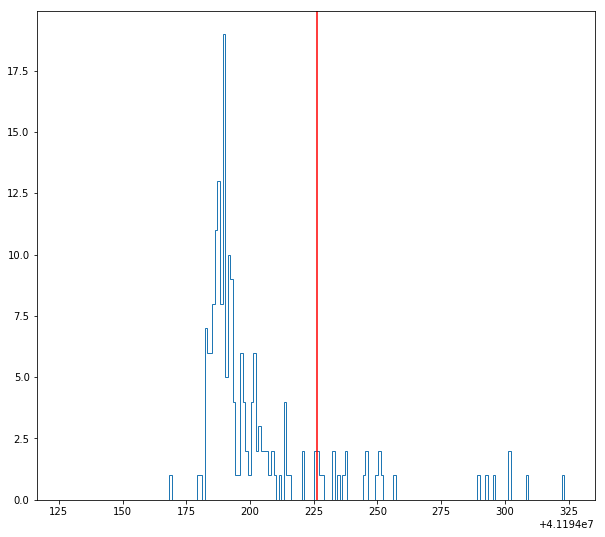

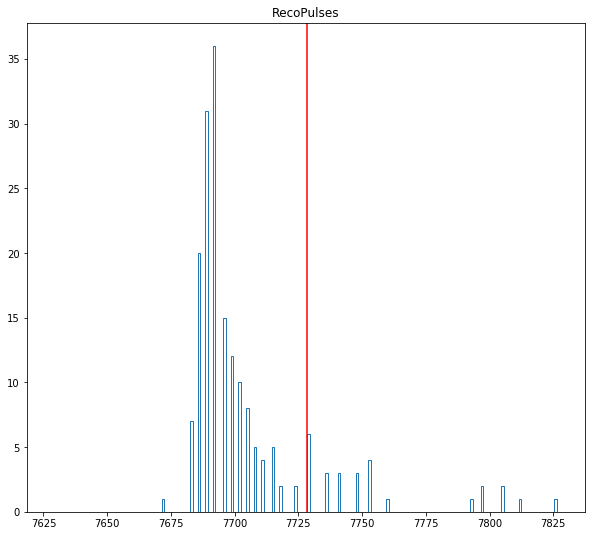

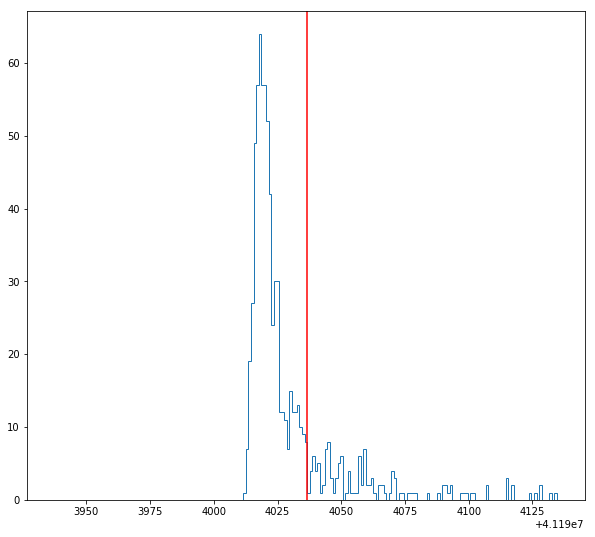

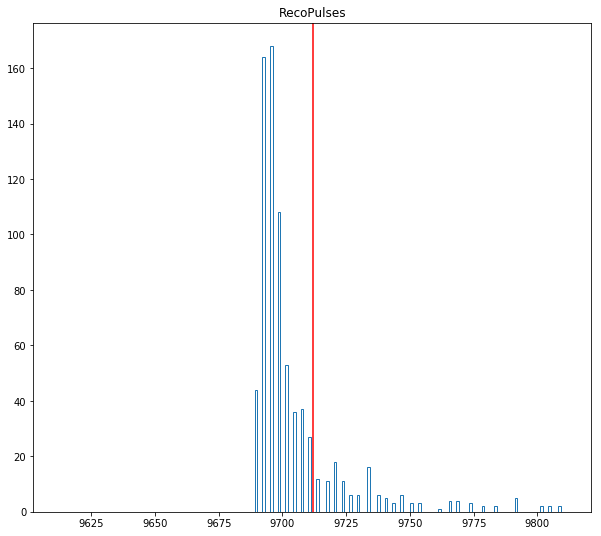

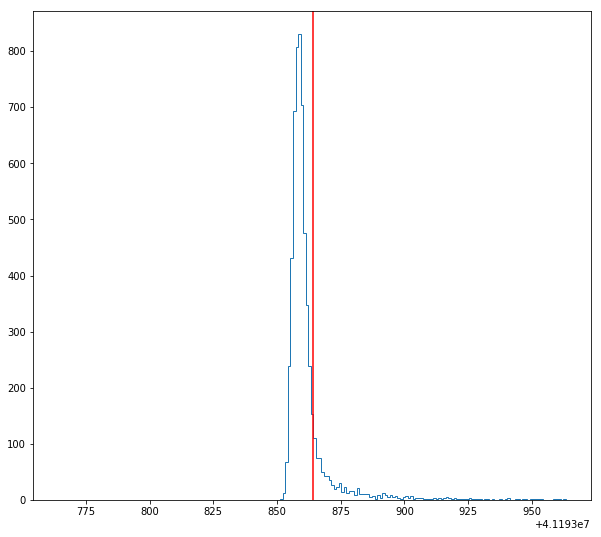

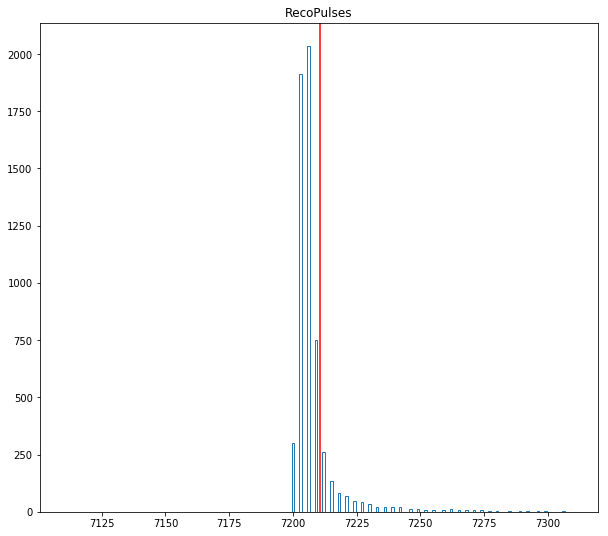

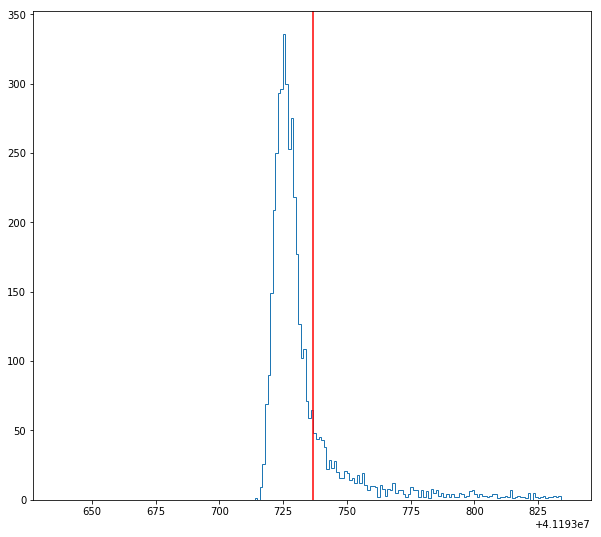

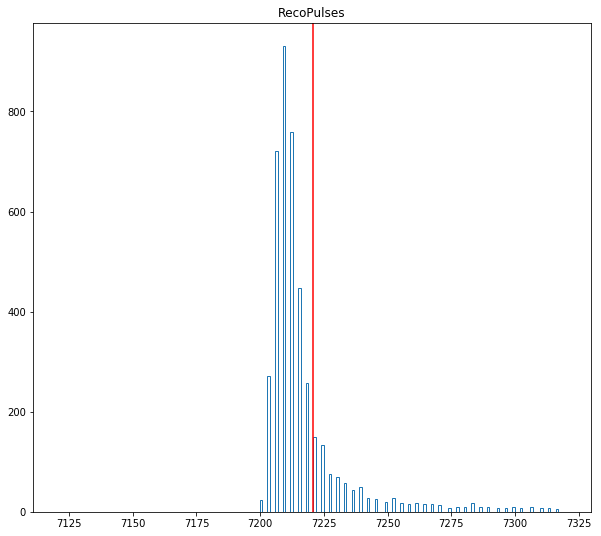

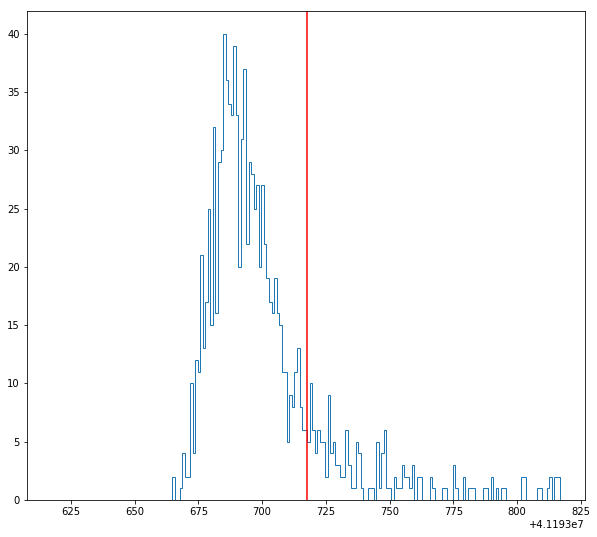

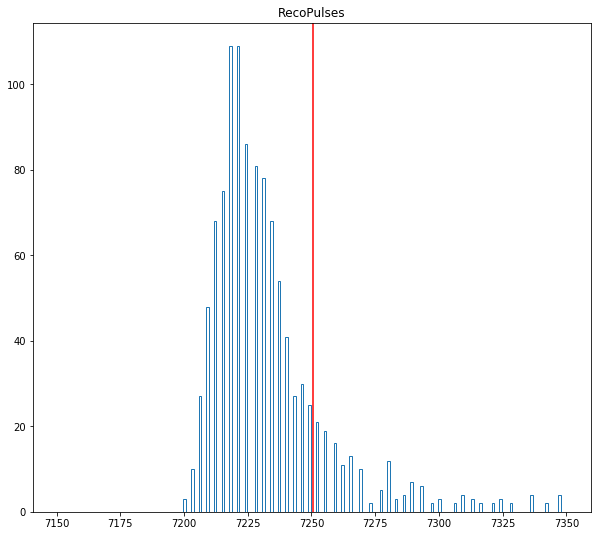

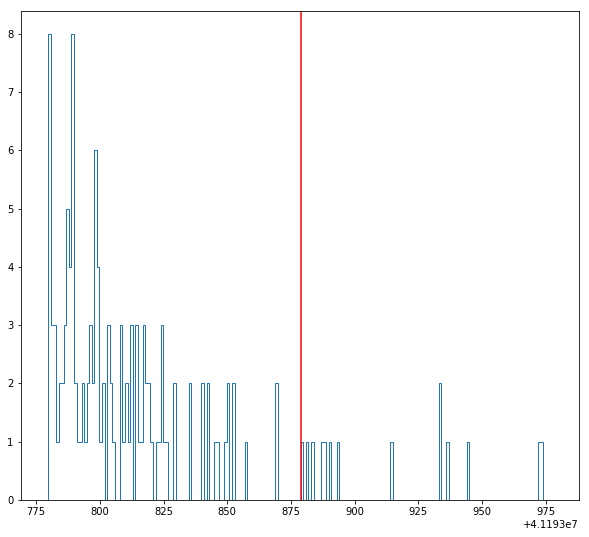

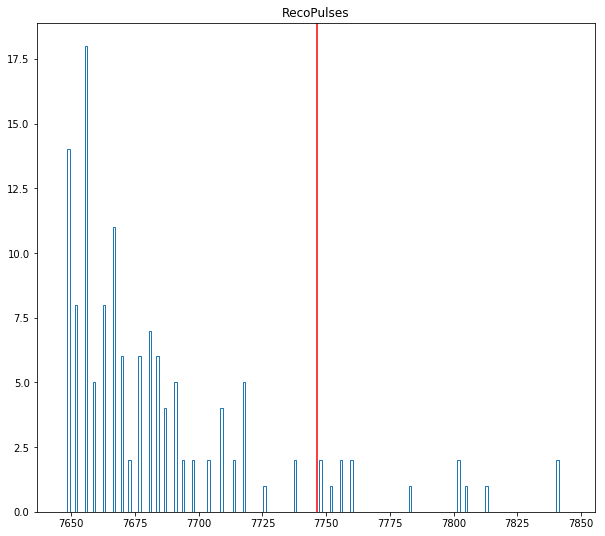

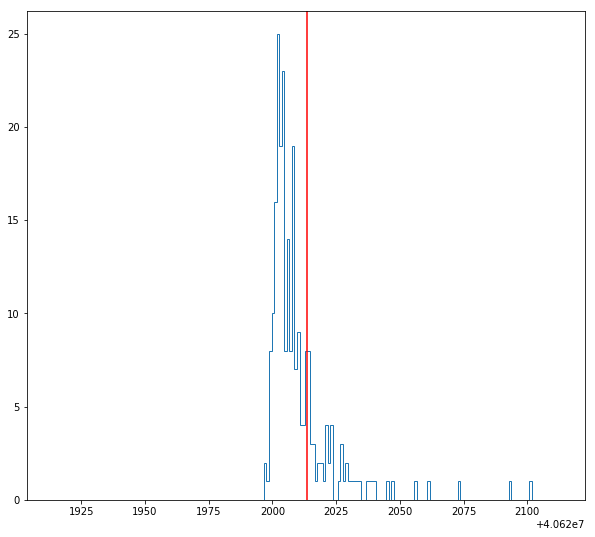

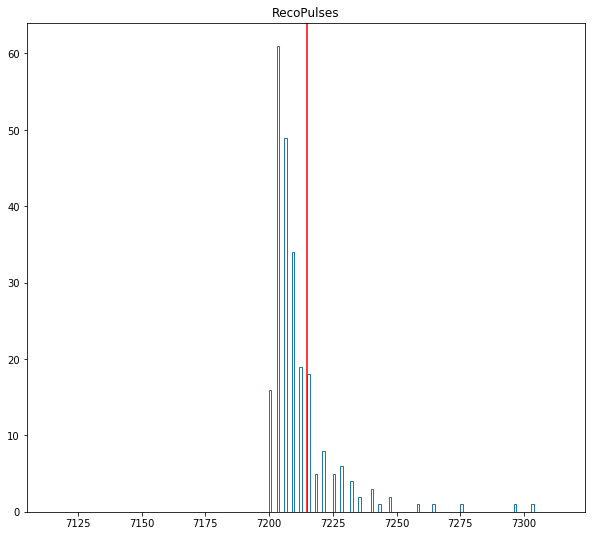

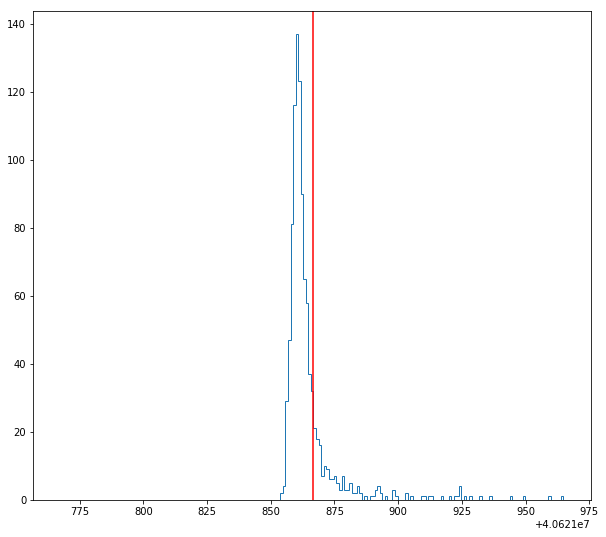

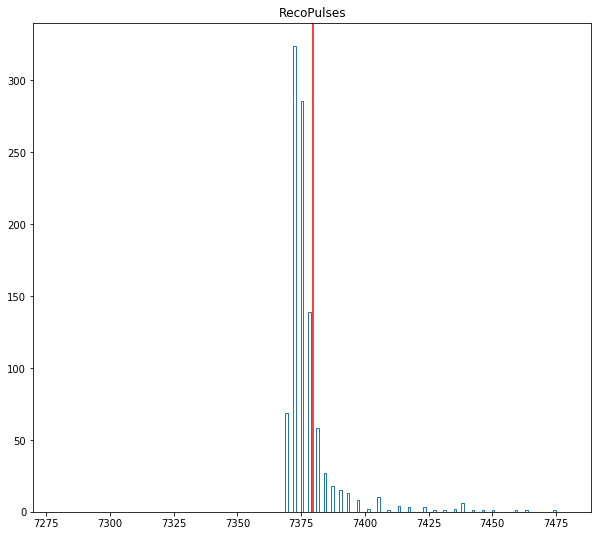

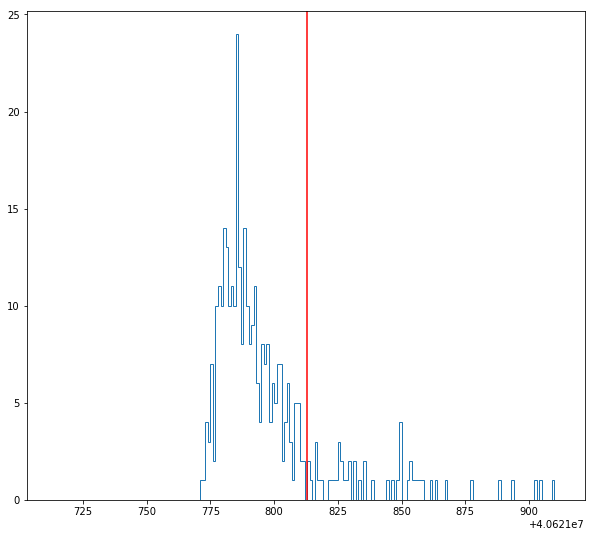

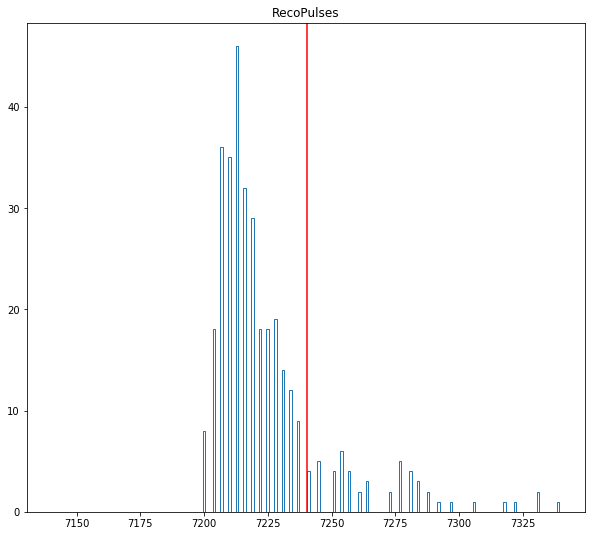

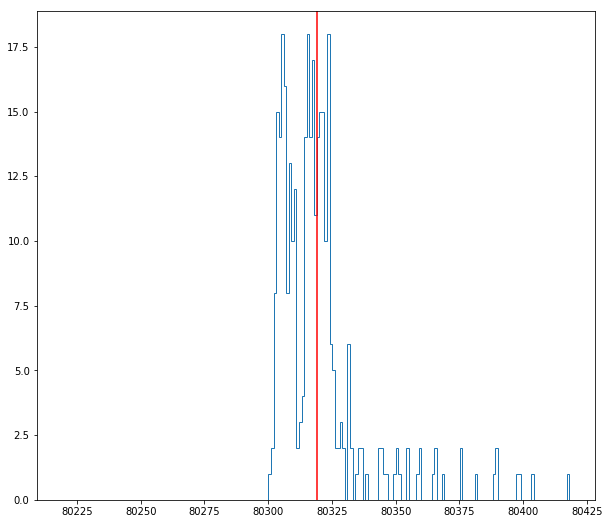

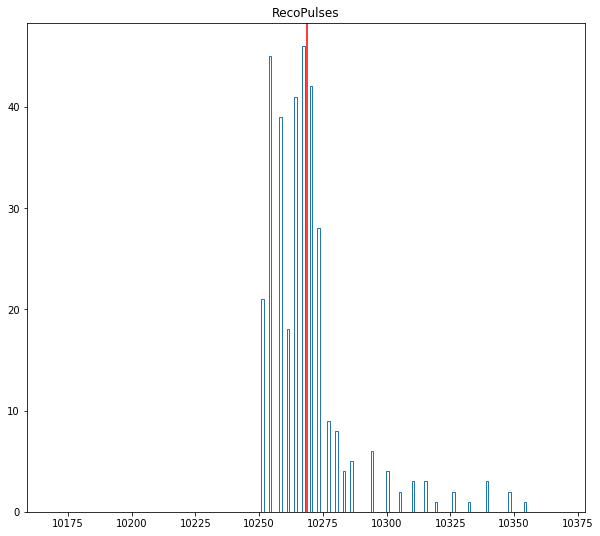

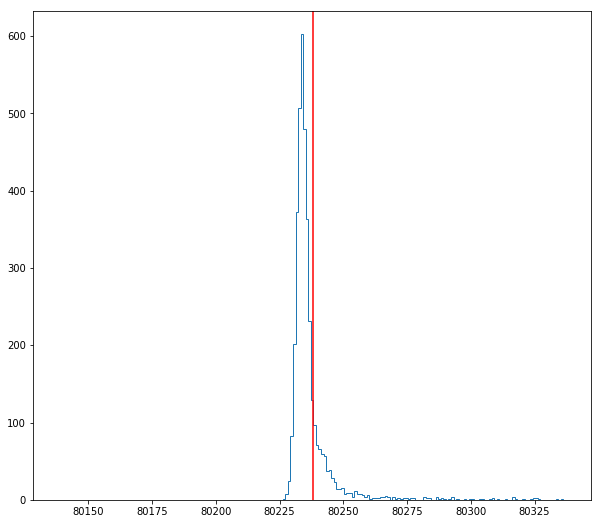

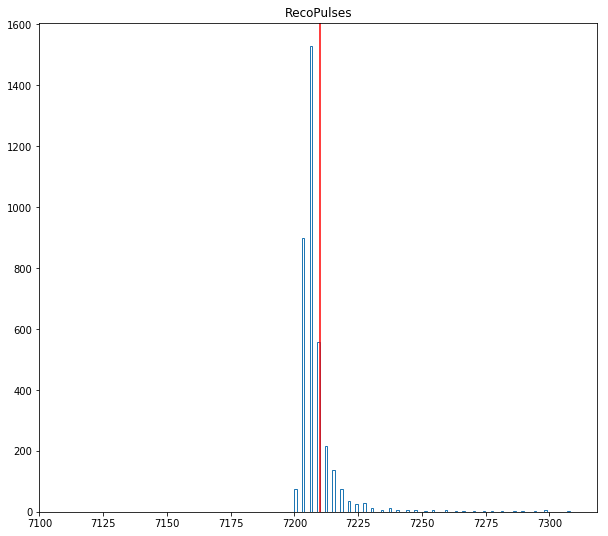

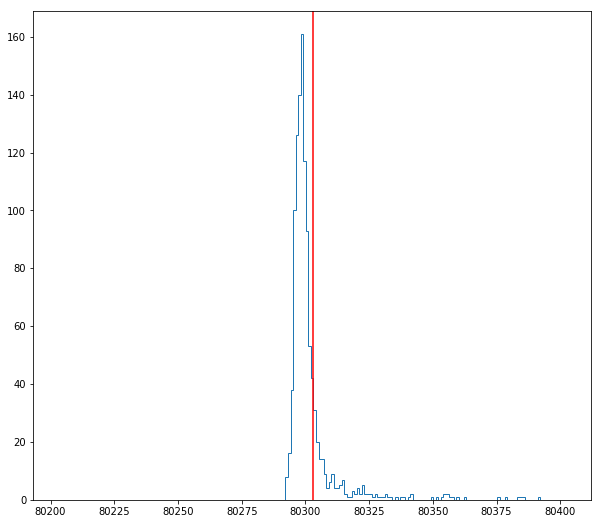

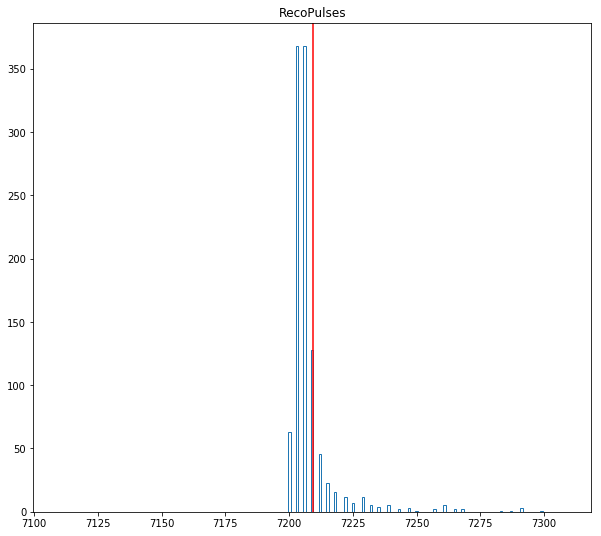

In [2]:
for i in range(713, 714):
    inFile = dataio.I3File('/data/p-one/akatil/step_5_medium_water/NuTau_NuE_20Events/step_5_'+str(i)+'_medium_water_custom_mDOM_recoPulse.i3.gz')
    for frame in inFile:
        
        recoPulseMap = frame['I3RecoPulses']
        noiseMap = frame["MCPESeriesMap"]
        mcpeMap = frame["NoiseSeriesMap"]
        
        for omkey in noiseMap.keys():
            noise_mcpeList = noiseMap[omkey]
            noise_timeList = np.array([mcpe.time for mcpe in noise_mcpeList])
            
            if omkey in mcpeMap.keys():
                mcpeList = mcpeMap[omkey]
                timeList = np.array([mcpe.time for mcpe in mcpeList])
                tot_timeList = np.append(timeList, noise_timeList)
            else:
                tot_timeList = noise_timeList
                
            recoPulseList = recoPulseMap[omkey]
            recoPulse_timeList = np.array([recoPulse.time for recoPulse in recoPulseList])
            recoPulse_chargeList = np.array([recoPulse.charge for recoPulse in recoPulseList])     
            
            print(len(tot_timeList), sum(recoPulse_chargeList))
            
        
            if len(tot_timeList) > 100:
                mean = tot_timeList.mean()
                bins = np.arange(mean - 100, mean + 100, 1)
                plt.figure(figsize=(10,9))
                plt.hist(tot_timeList, bins=bins, histtype='step')
                plt.axvline(x=mean, c='r')
                
                meanR = sum(recoPulse_timeList*recoPulse_chargeList)/sum(recoPulse_chargeList)
                binsR = np.arange(meanR - 100, meanR + 100, 1)
                #weights = recoPulse_chargeList[(recoPulse_timeList >= (meanR - 100)) & (recoPulse_timeList < (meanR + 100))]
                #print(len(recoP))
                plt.figure(figsize=(10,9))
                plt.hist(recoPulse_timeList, bins=binsR, histtype='step', weights=recoPulse_chargeList)
                plt.axvline(x=meanR, c='r')
                plt.title('RecoPulses')
                
            

In [29]:
dataclasses.I3OMGeo?